In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
trip_data_202304 = pd.read_csv('Documents/TripData_Analysis/original_data/202304-divvy-tripdata.csv')

In [40]:
trip_data_202305 = pd.read_csv('Documents/TripData_Analysis/original_data/202305-divvy-tripdata.csv')

In [41]:
trip_data_202306 = pd.read_csv('Documents/TripData_Analysis/original_data/202306-divvy-tripdata.csv')

In [42]:
trip_data_202307 = pd.read_csv('Documents/TripData_Analysis/original_data/202307-divvy-tripdata.csv')

In [43]:
trip_data_202308 = pd.read_csv('Documents/TripData_Analysis/original_data/202308-divvy-tripdata.csv')

In [44]:
trip_data_202309 = pd.read_csv('Documents/TripData_Analysis/original_data/202309-divvy-tripdata.csv')

In [45]:
trip_data_202310 = pd.read_csv('Documents/TripData_Analysis/original_data/202310-divvy-tripdata.csv')

In [46]:
trip_data_202311 = pd.read_csv('Documents/TripData_Analysis/original_data/202311-divvy-tripdata.csv')

In [47]:
trip_data_202312 = pd.read_csv('Documents/TripData_Analysis/original_data/202312-divvy-tripdata.csv')

In [48]:
trip_data_202401 = pd.read_csv('Documents/TripData_Analysis/original_data/202401-divvy-tripdata.csv')

In [49]:
trip_data_202402 = pd.read_csv('Documents/TripData_Analysis/original_data/202402-divvy-tripdata.csv')

In [50]:
trip_data_202403 = pd.read_csv('Documents/TripData_Analysis/original_data/202403-divvy-tripdata.csv')

In [51]:
trip_data = pd.concat([trip_data_202304, trip_data_202305, trip_data_202306, trip_data_202307, trip_data_202308, trip_data_202309, trip_data_202310 ,
                       trip_data_202311, trip_data_202312, trip_data_202401, trip_data_202402, trip_data_202403])

In [52]:
del [trip_data_202304, trip_data_202305, trip_data_202306, trip_data_202307, trip_data_202308, trip_data_202309, trip_data_202310 ,
                       trip_data_202311, trip_data_202312, trip_data_202401, trip_data_202402, trip_data_202403]

In [53]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5750177 entries, 0 to 301686
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 614.2+ MB


In [54]:
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member


In [55]:
trip_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    874450
start_station_id      874450
end_station_name      929226
end_station_id        929226
start_lat                  0
start_lng                  0
end_lat                 7566
end_lng                 7566
member_casual              0
dtype: int64

In [56]:
trip_data.dropna(inplace=True)

In [57]:
trip_data.duplicated().sum()

0

In [58]:
trip_data['started_at'] = pd.to_datetime(trip_data['started_at'])
trip_data['ended_at'] = pd.to_datetime(trip_data['ended_at'])

In [59]:
trip_data['ride_length'] = trip_data['ended_at'] - trip_data['started_at']

In [60]:
trip_data = trip_data.rename(columns= {'member_casual':'user_type'})

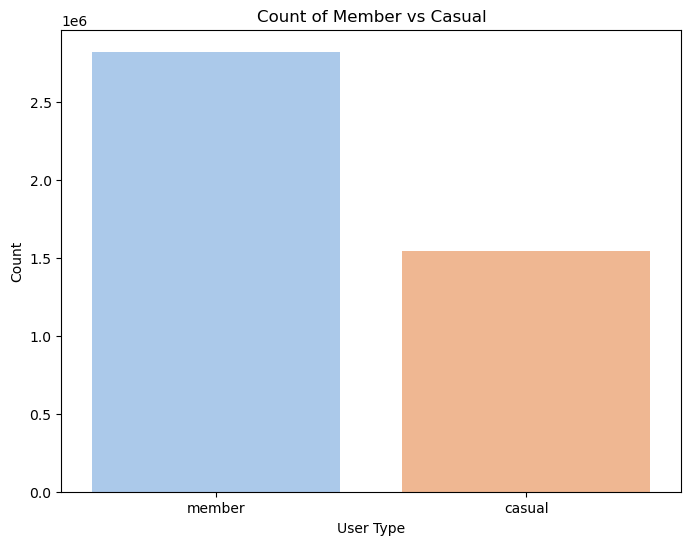

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(data=trip_data, x='user_type', palette='pastel')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Count of Member vs Casual')
plt.show()

In [62]:
trip_data['user_type'].value_counts()

user_type
member    2820966
casual    1541272
Name: count, dtype: int64

In [63]:
trip_data['hour'] = trip_data['started_at'].dt.hour

In [64]:
trip_data.groupby(['hour','user_type']).size()

hour  user_type
0     casual        24941
      member        23547
1     casual        16042
      member        13512
2     casual         9175
      member         7273
3     casual         4741
      member         4780
4     casual         3525
      member         6041
5     casual         8168
      member        26833
6     casual        21500
      member        84751
7     casual        38532
      member       158876
8     casual        52835
      member       195972
9     casual        53237
      member       128356
10    casual        67953
      member       114604
11    casual        86045
      member       135379
12    casual       101972
      member       154236
13    casual       105817
      member       152862
14    casual       109680
      member       155352
15    casual       121082
      member       191654
16    casual       140012
      member       262214
17    casual       151980
      member       306973
18    casual       127179
      member       235

In [65]:
grouped = trip_data.groupby(['hour', 'user_type']).size().reset_index(name='count')

In [66]:
colors = sns.color_palette("husl", 14)

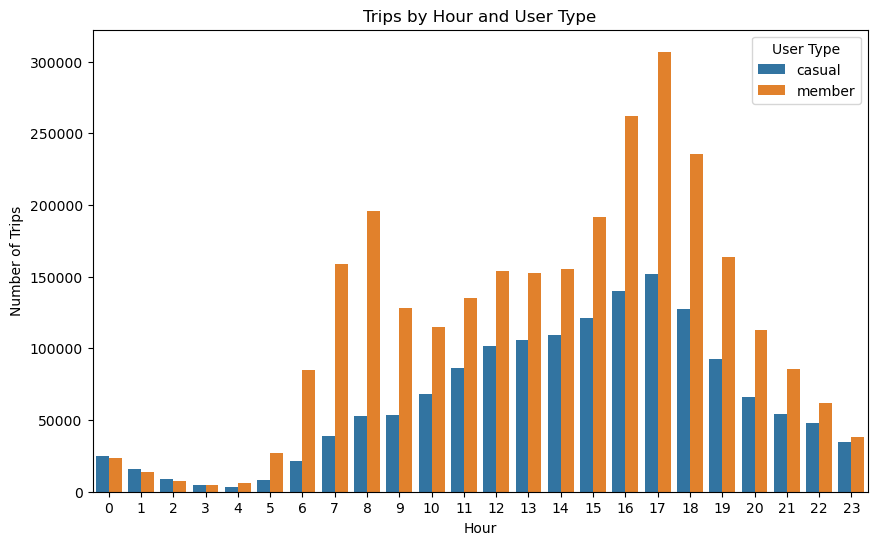

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', hue='user_type', data=grouped)
plt.title('Trips by Hour and User Type')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()

In [68]:
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
trip_data['weekday'] = trip_data['started_at'].dt.weekday.map(weekday_names)

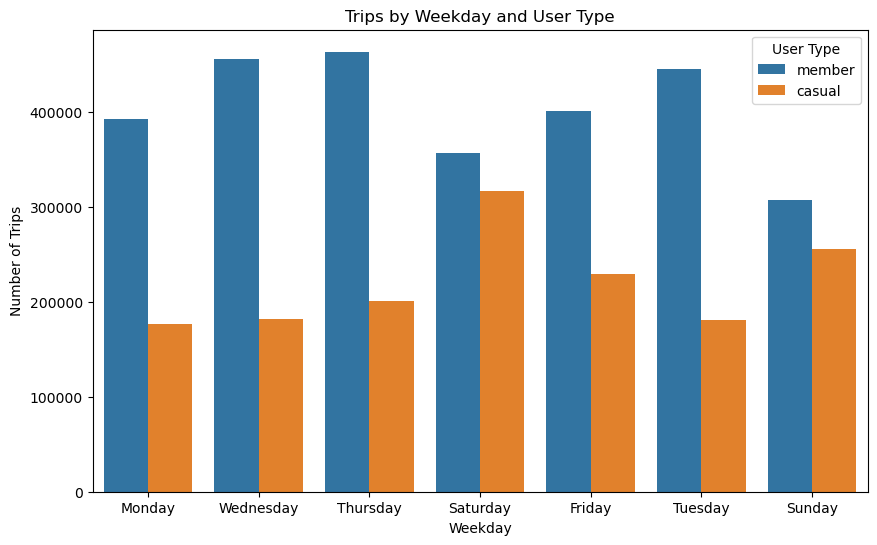

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(data=trip_data,x='weekday',hue='user_type')
plt.title('Trips by Weekday and User Type')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()

In [70]:
trip_data['ride_length'] = trip_data['ride_length'].dt.total_seconds() / 60
grouped_data = trip_data.groupby(['weekday', 'user_type'])['ride_length'].mean().reset_index()

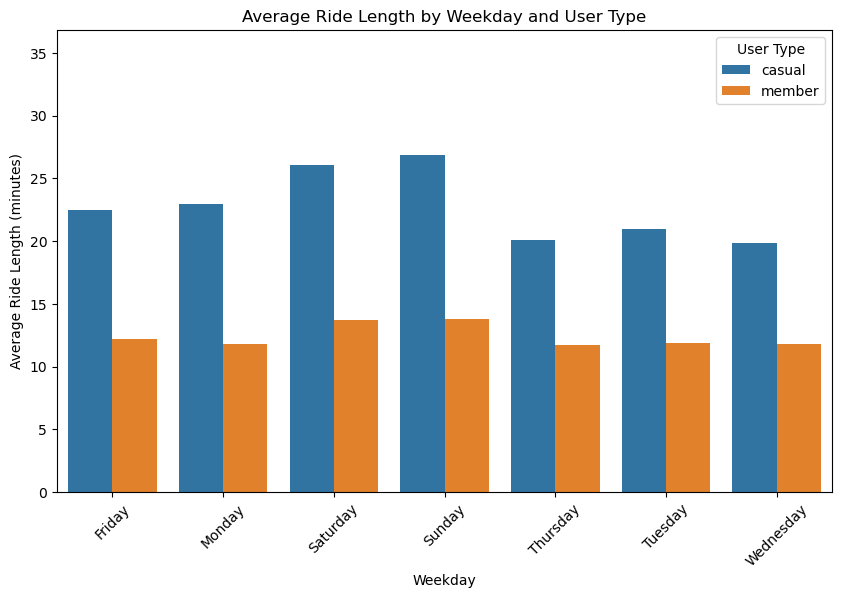

In [71]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='weekday', y='ride_length', hue='user_type')


ax.set_ylim(0, grouped_data['ride_length'].max() + 10)  


plt.title('Average Ride Length by Weekday and User Type')
plt.xlabel('Weekday')
plt.ylabel('Average Ride Length (minutes)')
plt.legend(title='User Type')
plt.xticks(rotation=45)


plt.show()